In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('Twitter_Emotion_Dataset.csv')

In [5]:
df.head(5)

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


In [6]:
df['label'].value_counts()

anger      1101
happy      1017
sadness     997
fear        649
love        637
Name: label, dtype: int64

In [7]:
df['length'] = df['tweet'].apply(len)

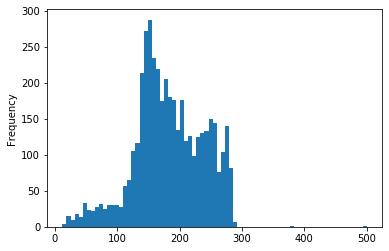

In [8]:
df['length'].plot(bins=75,kind='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000153B57E8828>,
      dtype=object)

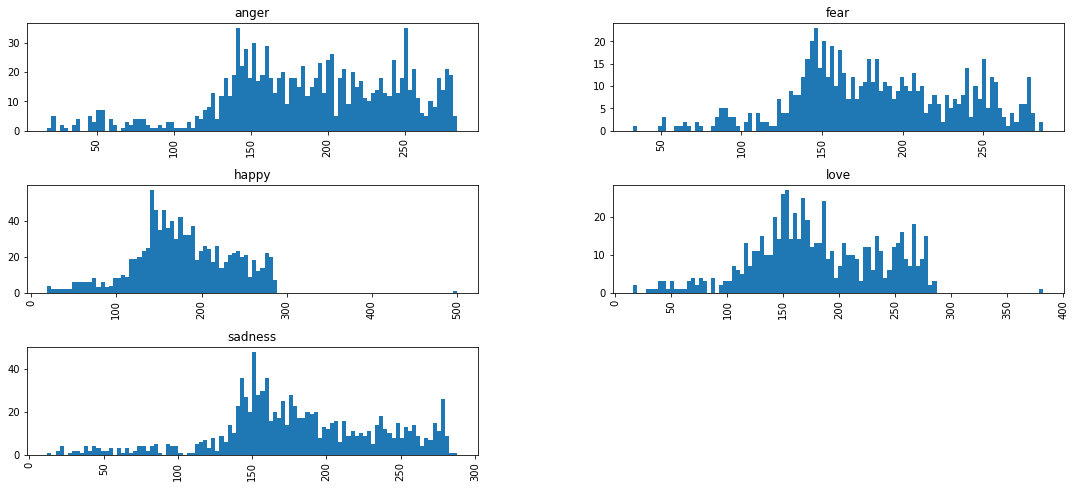

In [9]:
df.hist(column='length',by='label',bins=100,figsize=(18,8))

In [10]:
df.groupby('label').describe()

length                                                         
          count        mean        std   min    25%    50%    75%    max
label                                                                   
anger    1101.0  187.948229  56.739309  18.0  149.0  189.0  235.0  284.0
fear      649.0  183.790447  50.405417  33.0  148.0  179.0  221.0  287.0
happy    1017.0  178.261554  56.445033  19.0  143.0  173.0  218.0  500.0
love      637.0  180.249608  57.396931  16.0  144.0  173.0  226.0  382.0
sadness   997.0  180.752257  55.531223  12.0  149.0  176.0  221.0  288.0

In [11]:
df[df['length']==500]['tweet'].iloc[0]

'Acara tahunan "Sanusi Family", ini lah wajah para anak, cucu, cucu menantu, dan cicit terempong. Smg thn berikutnya bs makin kompak dan lengkap #7-8juli2018 [URL]\nanger;Wkwkwkw Keknya dah seminggu lebih meledak2 mulu. Emang orang sekitar gue pada gblk atau emang gaada otaknya dari dulu cuma gue nya yg sabar\nsadness;sabar ya boy kamu slalu d hina tmanku pdhal kamu ndak salah apa"" kamu slalu d bipang manusia lastik tpikan kamu bukan manusia plastik. Kapan temanku tdak mrnghinamu boy hwaiting boy"'

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df['tweet']
y = df['label']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [16]:
# dikarenakan kata dari tweet yang sangat beragam membuat proses tfidf menjadi tidak efektif
pipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [17]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [18]:
prediksi = pipeline.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print(classification_report(y_test,prediksi))

              precision    recall  f1-score   support

       anger       0.55      0.87      0.68       229
        fear       1.00      0.24      0.38       119
       happy       0.73      0.60      0.66       214
        love       0.91      0.36      0.52       119
     sadness       0.46      0.61      0.52       200

    accuracy                           0.59       881
   macro avg       0.73      0.54      0.55       881
weighted avg       0.68      0.59      0.58       881



In [21]:
print(confusion_matrix(y_test,prediksi))

[[200   0   5   0  24]
 [ 50  28   8   1  32]
 [ 42   0 128   3  41]
 [ 11   0  15  43  50]
 [ 58   0  19   0 123]]


In [22]:
multinomial_pipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('classifier',MultinomialNB())
])
sgdc_pipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('classifier',SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))
])
logreg_pipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier',LogisticRegression(solver='newton-cg',multi_class='auto'))
])
cnb_pipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('classifier',ComplementNB())
])

In [23]:
multinomial_pipeline.fit(X_train,y_train)
sgdc_pipeline.fit(X_train,y_train)
logreg_pipeline.fit(X_train,y_train)
cnb_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 ComplementNB(alpha=1.0, class_prior=None, fit_prior=True,
                              norm=False))],
         verbose=False)

In [24]:
multinomial_prediksi = multinomial_pipeline.predict(X_test)
sgdc_prediksi = sgdc_pipeline.predict(X_test)
logreg_prediksi = logreg_pipeline.predict(X_test)
cnb_prediksi = cnb_pipeline.predict(X_test)

In [25]:
print('Dengan menggunakan MultinomialNB')
print('\n')
print(classification_report(y_test,multinomial_prediksi))
print(confusion_matrix(y_test,multinomial_prediksi))

Dengan menggunakan MultinomialNB


              precision    recall  f1-score   support

       anger       0.68      0.81      0.74       229
        fear       0.67      0.61      0.64       119
       happy       0.74      0.58      0.65       214
        love       0.74      0.69      0.71       119
     sadness       0.54      0.59      0.56       200

    accuracy                           0.66       881
   macro avg       0.67      0.66      0.66       881
weighted avg       0.67      0.66      0.66       881

[[185  11   7   1  25]
 [ 19  72  12   2  14]
 [ 25   6 125  18  40]
 [  4   2   7  82  24]
 [ 38  16  19   8 119]]


In [26]:
print('Dengan menggunakan Stochastic Gradient Descent')
print('\n')
print(classification_report(y_test,sgdc_prediksi))
print(confusion_matrix(y_test,sgdc_prediksi))

Dengan menggunakan Stochastic Gradient Descent


              precision    recall  f1-score   support

       anger       0.63      0.62      0.63       229
        fear       0.66      0.64      0.65       119
       happy       0.61      0.70      0.65       214
        love       0.73      0.79      0.76       119
     sadness       0.54      0.45      0.49       200

    accuracy                           0.63       881
   macro avg       0.63      0.64      0.63       881
weighted avg       0.62      0.63      0.62       881

[[142  16  29   5  37]
 [ 16  76  17   1   9]
 [ 20  10 150  10  24]
 [  6   3   9  94   7]
 [ 41  10  41  19  89]]


In [27]:
print('Dengan menggunakan Logistic Regression')
print('\n')
print(classification_report(y_test,logreg_prediksi))
print(confusion_matrix(y_test,logreg_prediksi))

Dengan menggunakan Logistic Regression


              precision    recall  f1-score   support

       anger       0.63      0.73      0.68       229
        fear       0.68      0.56      0.61       119
       happy       0.62      0.55      0.58       214
        love       0.62      0.67      0.64       119
     sadness       0.48      0.47      0.47       200

    accuracy                           0.60       881
   macro avg       0.60      0.60      0.60       881
weighted avg       0.60      0.60      0.59       881

[[168  11  15   7  28]
 [ 22  67   7   2  21]
 [ 30   4 117  27  36]
 [  5   3  14  80  17]
 [ 42  14  36  14  94]]


In [28]:
print('Dengan menggunakan ComplementNB')
print('\n')
print(classification_report(y_test,cnb_prediksi))
print(confusion_matrix(y_test,cnb_prediksi))

Dengan menggunakan ComplementNB


              precision    recall  f1-score   support

       anger       0.67      0.81      0.73       229
        fear       0.60      0.72      0.65       119
       happy       0.72      0.57      0.64       214
        love       0.60      0.79      0.68       119
     sadness       0.60      0.40      0.48       200

    accuracy                           0.64       881
   macro avg       0.64      0.66      0.64       881
weighted avg       0.65      0.64      0.64       881

[[185  17   8   7  12]
 [ 16  86   6   3   8]
 [ 29   7 123  30  25]
 [  4   5   8  94   8]
 [ 43  29  25  23  80]]


In [29]:
tweet = ["Soal 'mantan'.Jadi gimana? Masih mikirin mantan?"]
prediksi_test_cnb = multinomial_pipeline.predict(tweet)

In [30]:
prediksi_test_cnb

array(['sadness'], dtype='<U7')

In [31]:
multinomial_pipeline.predict_proba(tweet)

array([[0.17668664, 0.08828539, 0.01820381, 0.0026726 , 0.71415156]])

In [32]:
import joblib

In [33]:
joblib.dump(multinomial_pipeline, 'model_multinomial_twitter')

['model_multinomial_twitter']

In [34]:
np.arange(0,1,.2)

array([0. , 0.2, 0.4, 0.6, 0.8])

In [35]:
grafik_value = multinomial_pipeline.predict_proba(tweet)

In [36]:
grafik_value[0][1]

0.0882853943767773

In [37]:
grafik_value = pd.Series(grafik_value[0])

In [38]:
nama_grafik = pd.Series(['anger','fear','happiness','love','sad'], name="Emosi")
labels = ['anger','fear','happiness','love','sad']

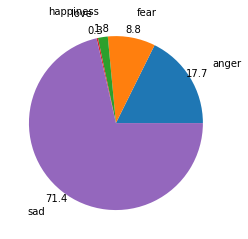

In [64]:
plt.pie(x=grafik_value, autopct='%.1f', pctdistance=1.1, labeldistance=1.3, labels=labels)
plt.show()

In [40]:
# alternatif perkecil target jadi emosi positif atau emosi negatif

In [41]:
print(multinomial_pipeline.score(X_test,y_test))

0.6617480136208853


In [42]:
data_tweet = multinomial_pipeline.predict_proba(tweet)*100

In [43]:
data_tweet[0][1]

8.82853943767773

In [44]:
data_tweet = pd.Series(data_tweet[0], name='Persentasi')

In [45]:
tweet_summary = pd.concat([data_tweet,nama_grafik],axis=1)

In [46]:
tweet_summary

,Persentasi,Emosi
0,17.668664,anger
1,8.828539,fear
2,1.820381,happiness
3,0.267260,love
4,71.415156,sad


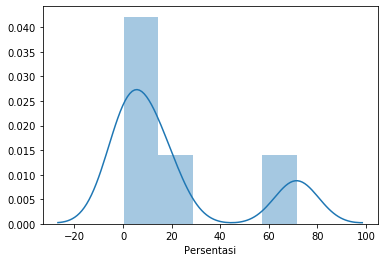